<a href="https://colab.research.google.com/github/marinapor/Mis-tareas/blob/master/EstadisticaSemanaUno_Marina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SET DE DATOS

In [35]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded=files.upload()



In [23]:
df = pd.read_csv("DataSetSemana1.csv")
df

,Unnamed: 0,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,0,1,Medium,1,4,3,1,33.73
1,1,1,Medium,1,4,3,2,35.67
2,2,1,Medium,1,4,3,3,29.03
3,3,1,Medium,1,4,3,4,39.25
4,4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...,...
543,543,10,Large,919,2,1,4,64.34
544,544,10,Large,920,14,2,1,50.20
545,545,10,Large,920,14,2,2,45.75
546,546,10,Large,920,14,2,3,44.29


UNO: HACER 5 GRAFICAS INTERPRETADAS.

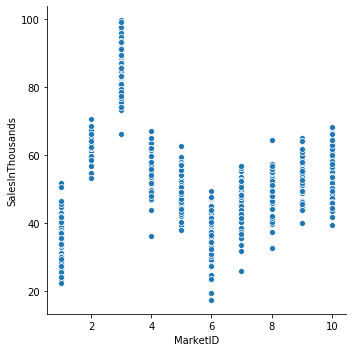

In [0]:
grafica1 = sns.relplot(x="MarketID", y="SalesInThousands", data = df)
plt.show()

Lo que puedo interpretar en la grafica anterior es que las tiendas etiquetadas con el id 3 muestran una mayor ganancia en miles con respecto a las demas. Aquellas tiendas etiquetadas con el id 6 muestran una menor ganancia con respecto a las otras. Los datos entre los almacenes con el mismo id estan muy dispersos y la gráfica no observa un comportamiento normal

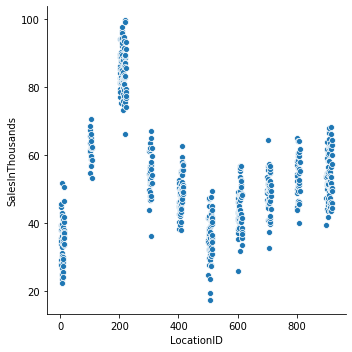

In [0]:
grafica2= sns.relplot(x="LocationID", y="SalesInThousands", data = df)
plt.show()

Lo que puedo ver en la gráfica anterior es un comportamiento muy similar a la primera gráfica. Al parecer las ventas dependen fuertemente de la localización del almacén. Las tiendas con un id de localización cercano a 200 obtienen mas ganancias. Por el contrario aquellas con id cercano a 500 obtienen menos ventas en promedio. Al parecer son dos curvas normales superpuestas, la primera con un corrimiento a la derecha con una media de distribución de ventas que tiene un máximo en id 250 y la otra con una media cercana a id de 900 con corrimiento a la izquierda. La dispersión entre datos en muy grande.

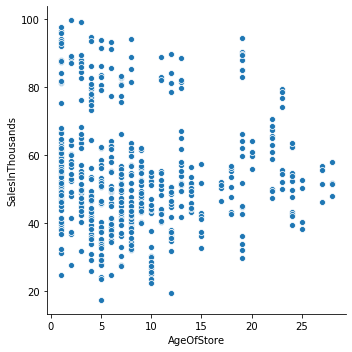

In [0]:
grafica2= sns.relplot(x="AgeOfStore", y="SalesInThousands", data = df)
plt.show()

Aquí no veo una correlación entre la edad del almacén con las ventas generadas. Los datos están muy dispersos entre si.

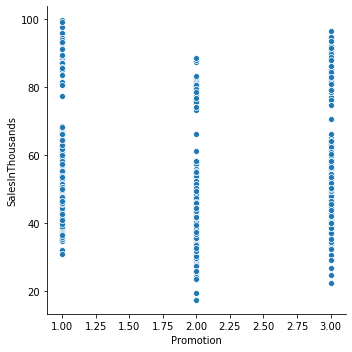

In [0]:
grafica2= sns.relplot(x="Promotion", y="SalesInThousands", data = df)
plt.show()

Esta gráfica nos muestra que existe una relación entre las ventas obtenidas con el  tipo de promoción aplicada. Las tiendas que aplican la promoción 1 tienen mayores ventas en promedio, pero los resultados obtenidos son muy similares a los que se obtienen aplicando la promoción 3. Los datos estan muy dispersos entre si, lo que me lleva a dudar si efectivamente la promocion 1 es mejor sobre la 3, aúnque ambas son claramente mejores que la promoción2. 

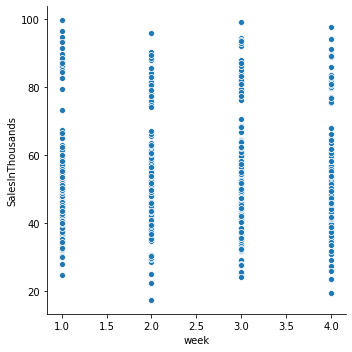

In [0]:
grafica2= sns.relplot(x="week", y="SalesInThousands", data = df)
plt.show()

Al ver esta grafica yo podría pensar que el tiempo que duraron las promociones medido en semanas no influye en las ganancias obtenidas. Veo una distribución uniforme en las ventas con datos muy dispersos entre si.

SEGUNDA PARTE. PRESENTAR DOS DATA FRAME AGRUPADOS

In [25]:
 df.groupby(by="MarketSize")
 df


,Unnamed: 0,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,0,1,Medium,1,4,3,1,33.73
1,1,1,Medium,1,4,3,2,35.67
2,2,1,Medium,1,4,3,3,29.03
3,3,1,Medium,1,4,3,4,39.25
4,4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...,...
543,543,10,Large,919,2,1,4,64.34
544,544,10,Large,920,14,2,1,50.20
545,545,10,Large,920,14,2,2,45.75
546,546,10,Large,920,14,2,3,44.29


Agrupando los datos de esta manera se puede apreciar que las ganancias se incrementan en aquellos almacenes de mayor tamaño.

In [26]:
df.groupby(by="Promotion")
df


,Unnamed: 0,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,0,1,Medium,1,4,3,1,33.73
1,1,1,Medium,1,4,3,2,35.67
2,2,1,Medium,1,4,3,3,29.03
3,3,1,Medium,1,4,3,4,39.25
4,4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...,...
543,543,10,Large,919,2,1,4,64.34
544,544,10,Large,920,14,2,1,50.20
545,545,10,Large,920,14,2,2,45.75
546,546,10,Large,920,14,2,3,44.29


Con este nueva agrupación se aprecia un incremento en las ventas obtenido por la promoción 1. Sin embargo no se ve una clara diferencia entre las promociones 3 y 2.

PARTE TRES. A/B TESTING ENTRE DOS DISTINTAS PROMOCIONES.

In [40]:
# Se compararán las promociones entre ellas 1 con 2, 1 con 3 y finalmente 3 con 2, a fin de demostrar cual es la mejor en relación a ventas obtenidas con una prueba tipo t.
# H0: No hay diferencia entre las promociones
# H1: Si hay mejores promociones unas respecto a otras.

t, p = st.ttest_ind( df.loc[df["Promotion"] == 1, "SalesInThousands"].values , df.loc[df["Promotion"] == 2, "SalesInThousands"].values, equal_var=True)
t, p

(6.453671702181005, 3.5506696512134566e-10)

Tomando en cuenta los valores obtenidos para t y p respectivamente, concluyo que por tener un valor de p cercano a cero la hipótesis nula se rechaza,y por ser el valor de t positivo, se concluye que la promoción 1 es mejor que la promoción 2.

In [41]:
t, p = st.ttest_ind( df.loc[df["Promotion"] == 1, "SalesInThousands"].values , df.loc[df["Promotion"] == 3, "SalesInThousands"].values, equal_var=True)
t, p

(1.5551383687293547, 0.12079667272313273)

Tomando en cuenta los valores obtenidos para t y p respectivamente, concluyo que por tener un valor de p cercano a cero la hipótesis nula se rechaza,y por ser el valor de t positivo, se concluye que la promoción 1 es mejor que la promoción 3.

In [42]:
t, p = st.ttest_ind( df.loc[df["Promotion"] == 2, "SalesInThousands"].values , df.loc[df["Promotion"] == 3, "SalesInThousands"].values, equal_var=True)
t, p

(-4.88139271089348, 1.562894303627738e-06)

Tomando en cuenta los valores obtenidos para t y p respectivamente, concluyo que por tener un valor de p cercano a cero la hipótesis nula se rechaza,y por ser el valor de t negativo, se concluye que la promoción 3 es mejor que la promoción 2.

En base a las comparaciones anteriores sobre las medias entre todas las combinaciones de muestras posibles, podemos concluir que en efecto la promoción 1 es mejor que la promoción 2 y la promoción 3, mientras que la promoción 3 es mejor que la promoción 2.

PARTE CUATRO: TE ATREVARÍAS A PRESENTAR ESTE RESULTADO FORMALMENTE?

In [44]:
std= df["SalesInThousands"].std(ddof=0)
std

16.73992123534422

In [46]:
uno = df.loc[df["Promotion"]==1, "SalesInThousands"]
uno

8      44.54
9      37.94
10     45.49
11     34.75
24     42.92
       ...  
539    61.63
540    59.87
541    62.99
542    57.20
543    64.34
Name: SalesInThousands, Length: 172, dtype: float64

In [50]:
media_uno = uno.mean()
std_uno = uno.std()
std_uno, media_uno

(16.553781697578724, 58.099011627907046)

In [54]:
from scipy.stats import skew
corrimiento = skew (uno)
corrimiento

0.8584598990251848

In [55]:
dos = df.loc[df["Promotion"]==2, "SalesInThousands"]
dos

4      27.81
5      34.67
6      27.98
7      27.72
12     39.28
       ...  
531    49.71
544    50.20
545    45.75
546    44.29
547    49.41
Name: SalesInThousands, Length: 188, dtype: float64

In [56]:
media_dos = dos.mean()
std_dos = dos.std()
std_dos, media_dos

(15.108954782812802, 47.329414893617084)

In [57]:
from scipy.stats import skew
corrimiento = skew (dos)
corrimiento

0.9205468089457273

In [58]:
tres = df.loc[df["Promotion"]==3, "SalesInThousands"]
tres

0      33.73
1      35.67
2      29.03
3      39.25
20     32.90
       ...  
487    58.33
532    53.50
533    56.34
534    51.83
535    50.20
Name: SalesInThousands, Length: 188, dtype: float64

In [59]:
media_tres = tres.mean()
std_tres = tres.std()
std_tres, media_tres

(16.766230774027896, 55.36446808510637)

In [60]:
from scipy.stats import skew
corrimiento = skew (tres)
corrimiento

0.7642424551272544

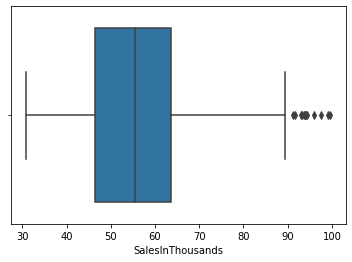

In [61]:
sns.boxplot(uno)

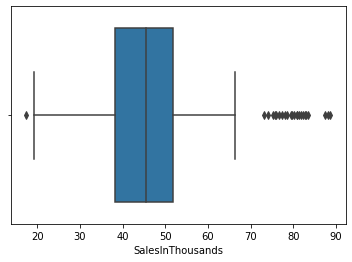

In [62]:
sns.boxplot(dos)

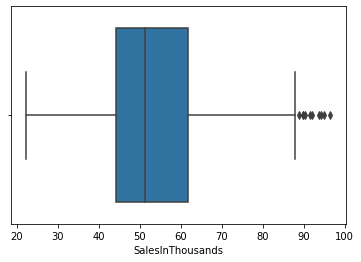

In [63]:
sns.boxplot(tres)

CONCLUSIÓN: En base a las desviaciones estándar y a las diferencias mínimas que se observan entre las ganancias obtenida con las diferentes promociones yo no me atrevería a dar por hecho que la promoción uno es mejor que las otras dos y menos podría concluír que hay una diferencia significativa entre las promociones dos y tres. Los datos estan muy dispersos entre si y por el tamaño de los errores estandar no creo que se pueda concluir nada.